# Воркшоп #5: Робота з Matplotlib, візуалізація даних


### ПОЧАТОК ПІДГОТОВЧОЇ ЧАСТИНИ

Цей воркшоп виконує...

Почнемо зі стандартних імпортів.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Тепер, зчитайте дані з датасету `sales.csv`.

In [4]:
df = pd.read_csv("sales.csv")
df

,Unnamed: 0,Product Category,Region,Sales Volume,Revenue,Product Name,NPS Score
0,0,Electronics,North,9.0,279.21,Headphones Model 919,74
1,1,Electronics,North,14.0,294.80,Smartwatch Model 919,7
2,2,Electronics,North,11.0,325.76,Headphones Model 223,7
3,3,Electronics,North,11.0,359.71,Laptop Model 162,30
4,4,Electronics,North,12.0,304.83,Smartwatch Model 727,-25
...,...,...,...,...,...,...,...
295,95,Home Goods,East,21.0,761.64,Vacuum Model 585,57
296,96,Home Goods,East,19.0,1128.18,Blender Model 745,74
297,97,Home Goods,East,41.0,1102.24,Microwave Model 671,76
298,98,Home Goods,East,20.0,790.05,Vacuum Model 476,74


In [5]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0 Product Category Region  Sales Volume  Revenue  \
0             0      Electronics  North           9.0   279.21   
1             1      Electronics  North          14.0   294.80   
2             2      Electronics  North          11.0   325.76   
3             3      Electronics  North          11.0   359.71   
4             4      Electronics  North          12.0   304.83   
..          ...              ...    ...           ...      ...   
295          95       Home Goods   East          21.0   761.64   
296          96       Home Goods   East          19.0  1128.18   
297          97       Home Goods   East          41.0  1102.24   
298          98       Home Goods   East          20.0   790.05   
299          99       Home Goods   East          21.0   788.51   

             Product Name  NPS Score  
0    Headphones Model 919         74  
1    Smartwatch Model 919          7  
2    Headphones Model 223          7  
3        Laptop M

### КІНЕЦЬ ПІДГОТОВЧОЇ ЧАСТИНИ
-----------------------------
### ПОЧАТОК СПІЛЬНОЇ ЧАСТИНИ


Спершу спробуйте вивести усі дані за допомогою функції `plt.scatter`. Нас цікавлять показники обʼєму продажів та прибутки. 


Text(0.5, 1.0, 'Sales Volume vs Revenue')

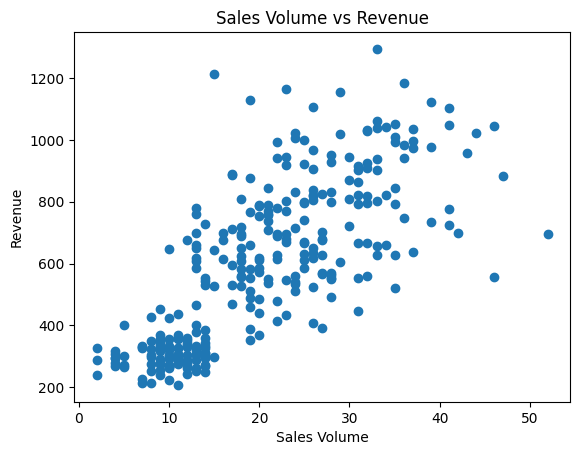

In [8]:
plt.scatter(df["Sales Volume"], df["Revenue"])
plt.xlabel("Sales Volume")
plt.ylabel("Revenue")
plt.title("Sales Volume vs Revenue")

In [9]:
df["Product Category"].unique()

array(['Electronics', 'Clothing', 'Home Goods'], dtype=object)

Чудово!
Тепер давайте спробуємо знайти деякі інсайти на цьому графіку. Спробуйте зобразити кожну з категорій товарів окремо, щоб їх можна було розрізнити.

Щоб не писати багато коду, скористайтесь циклами. А ще вам точно знадобиться `set` :) 

Text(0.5, 1.0, 'Sales Volume vs Revenue')

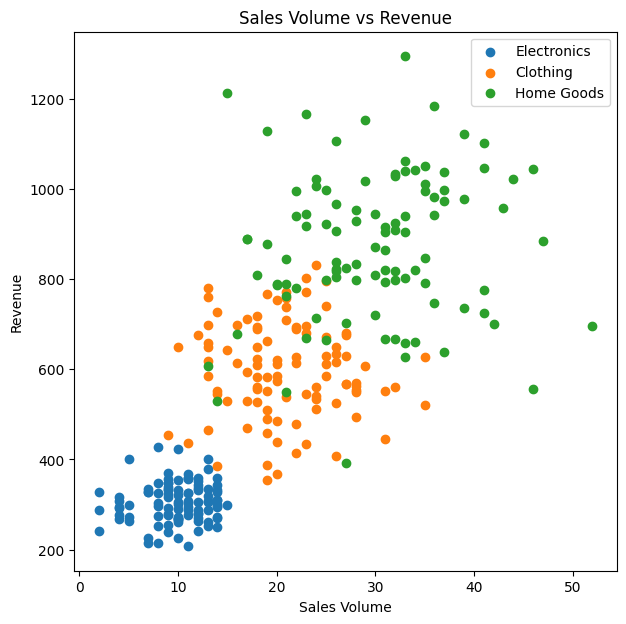

In [12]:
plt.figure(figsize=(7, 7), dpi=100)
for category in df["Product Category"].unique():
    category_df = df[df["Product Category"] == category]
    plt.scatter(category_df["Sales Volume"], category_df["Revenue"], label=category)
plt.legend()
plt.xlabel("Sales Volume")
plt.ylabel("Revenue")
plt.title("Sales Volume vs Revenue")


Гарно, еге ж? Але як зрозуміти, який колір ховає яку категорію? 
Для цього можна передати у функцію `scatter` аргумент label, а після всього викликати `plt.legend()`.

Крім того, додайте опис того, що означають вісі OX та OY.


Згадаємо першу лекцію по візуалізації даних: будь-який колір краще додатково продублювати формою. Спробуйте змінити позначки для кожної з груп. Тут допоможе аргумент `marker`, а у сам цикл можна додати використання функції `zip`, щоб було елегантніше. 

Про всяк випадок, у вас має вийти цикл по типу:

```Python
for category, marker in zip(set(df['Category']), ['o', '+', 's']):
   ...
```


Unnamed: 0                               1
Product Category                Home Goods
Region                                East
Sales Volume                          15.0
Revenue                            1211.99
Product Name        Coffee Maker Model 681
NPS Score                              -10
Ratio                            80.799333
Name: 201, dtype: object
Unnamed: 0                            49
Product Category             Electronics
Region                             North
Sales Volume                         2.0
Revenue                            327.8
Product Name        Smartwatch Model 107
NPS Score                            -34
Ratio                              163.9
Name: 49, dtype: object
Unnamed: 0                       65
Product Category           Clothing
Region                        South
Sales Volume                   10.0
Revenue                      648.39
Product Name        Dress Model 217
NPS Score                       -93
Ratio                      

Text(0.5, 1.0, 'Sales Volume vs Revenue')

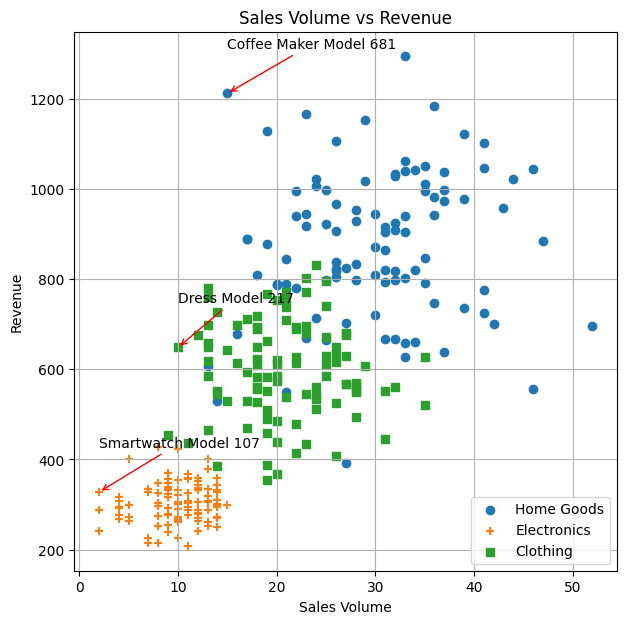

In [28]:
plt.figure(figsize=(7, 7), dpi=100)
plt.grid()
for category, marker in zip(set(df["Product Category"]), ['o', "+", "s"]):
    category_df = df[df["Product Category"] == category]
    plt.scatter(category_df["Sales Volume"], category_df["Revenue"], label=category, marker=marker)
    top_ratio = df.iloc[category_df["Ratio"].idxmax()]
    print(top_ratio)
    plt.annotate(top_ratio["Product Name"], (top_ratio["Sales Volume"], top_ratio["Revenue"]),
                xytext=(top_ratio["Sales Volume"], top_ratio["Revenue"] + 100),
                arrowprops=dict(color="red", arrowstyle="->") )


plt.legend(loc='lower right')
plt.xlabel("Sales Volume")
plt.ylabel("Revenue")
plt.title("Sales Volume vs Revenue")


Нарешті, давайте відмітимо найбільш "визначні" товари. Спробуйте використати функцію `plt.annotate`[*], щоб відмітити товар з найбільшою сумою `Revenue`. Крім того, цікаво, а у якого товару з кожної категорії найбільше співвідношення між `Revenue` та `Sales Volume`?

Саме час згадати про функцію `idxmax()` :)

[*] Зверніть увагу на параметри `xytext`, а також `color`/`backgroundcolor`. За бажання можете це все доповнити параметрами `bbox` та `arrowprops`.

In [31]:
df["Ratio"] = df["Revenue"] / df["Sales Volume"]
top_revenue = df.iloc[df["Revenue"].idxmax()]

Маю підозру, що ви вже зрозуміли, наскільки ж тяжким є гарне оформлення графіків.

-------

Давайте змінимо трохи тему і спробуємо провести базовий розвідувальний аналіз даних. Ми ще познайомимся на курсі з тим, а що ж це таке, а поки що спробуємо чисто візуально подивитися на дані. 

Скористайтесь `plt.hist` та подивіться на розподіл товарів по `Sales Volume`.

In [ ]:
import numpy as  np
custom_bins = [np.linspace(min(df["Sales Volume"]), max(df["Sales Volume"]), 10)]

for category in df["Product Category"].unique():
    plt.hist(df[df["Product Category"]])

Що ж, не суперінформативно. Давайте звернемо увагу, що перший аргумент `x` може бути не тільки типу `ArrayLike`, а і `Sequence[ArrayLike]`. 

Спробуйте передати туди масив з трьох масивів - дані по кожній з категорій. 

О, з цим вже можна працювати! 

Спробуйте ще передати параметр `stacked=True` 

In [ ]:
layout = [["A"], ["B"], ["C"]]
fig, axs = plt.subplot_mosaic(layout, figsize=(10, 10), sharex=True, sharey=True)

for i, category, color in zip(["A"],["B"],["C"], df["Product Category"].unique(), ["#FE7F2D", "#beaed4", "#619B8A"]):
    axs[i].hist(df[df["Product Category"] == category]["Sales Volume"], bins=10, color = color)
    axs[i].set_title(category)
    

Чудово. А тепер питання - а яким чином визначаються межі "бакетів"? 
Виявляється, за змовчуванням буде всього 10 бакетів, які матимуть однакові межі. Але є і інші стратегії. Спробуйте передати різні параметри у `bins` - наприклад, значення 20, або один з наступних рядків: `'auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges',  'sqrt'.` А ще спробуйте передати список (наприклад, [0, 15 , 20, 30, 50, 100])

### КІНЕЦЬ СПІЛЬНОЇ ЧАСТИНИ
-----------------------------
### ПОЧАТОК ДОМАШНЬОЇ ЧАСТИНИ


Тут з вашого боку потрібно трохи творчості і експериментів.
Підберіть будь-який датасет, який вам подобається (і який підходить для візуалізацій) і візуалізуйте два окремих "факти" про них. Наприклад, у контексті продажів це могли б бути "розподіл цін", "продажі по місяцях" та "графік залежності загальних продажів від ціни".

Головні вимоги:
- Графіків має бути декілька (мінімум один scatter і мінімум одна гістограмма) і вони мають бути поєднані у спільну Figure;
- Кожен графік має бути підписаним, з додатковими позначками там, де це має сенс. В ідеалі, графік мав би "читатися" без додаткових пояснень, а підписи/позначки мали б підкреслювати основний факт з відповідного графіку; 
  - Спробуйте використати `plt.annotate`
- Стилі графіків мають бути відмінні від тих, що за змовчуванням. Підберіть кольори, які вдало підходять до діаграми і які на ваш погляд є влучними.
